In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
img=cv2.imread("My_image.jpg")

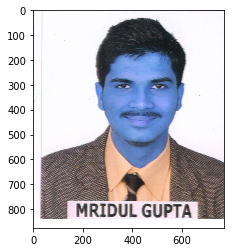

In [7]:
plt.imshow(img)

In [8]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

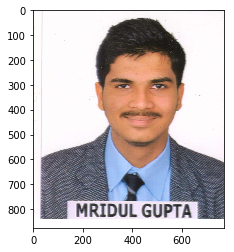

In [9]:
plt.imshow(img)

In [10]:
img.shape

(876, 768, 3)

In [19]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

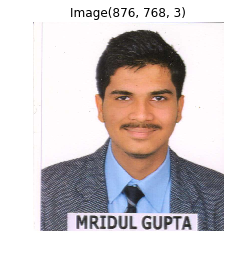

In [12]:
drawImg(img)

In [14]:
img=cv2.resize(img,(100,100))

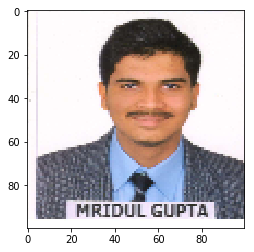

In [16]:
plt.imshow(img)

In [17]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

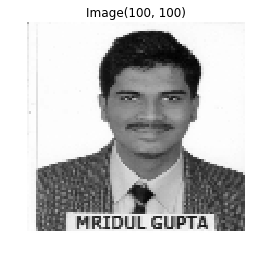

In [21]:
drawImg(img_gray)

In [26]:
def convolution(img,img_filter):
    W=img.shape[0]
    H=img.shape[1]
    
    F=img_filter.shape[0]
    
    new_img=np.zeros((W-F+1,H-F+1))
    
    for row in range (W-F+1):
        for col in range (H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col]+=img[row+i][col+j]*img_filter[i][j]
                    
                if(new_img[row][col]>255):
                    new_img[row][col]=255
                    
                elif new_img[row][col]<0:
                    new_img[row][col]=0
                    
    return new_img #activation map

In [27]:
img.shape

(100, 100, 3)

In [42]:
blur_filter=np.ones((3,3))/9
output1=convolution(img_gray,blur_filter)

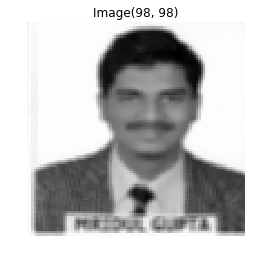

In [43]:
drawImg(output1)

In [44]:
edge_filter=np.array(([1,0,-1],[1,0,-1],[1,0,-1]))

In [46]:
print(edge_filter)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


In [48]:
edges_img=convolution(img_gray,edge_filter)

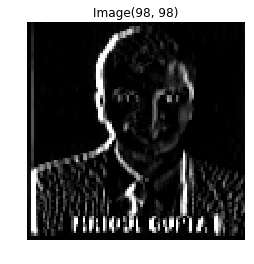

In [51]:
drawImg(edges_img)

In [58]:
pad_img=np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=0)

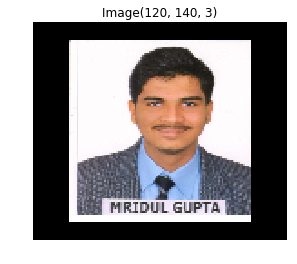

In [59]:
drawImg(pad_img)

In [60]:
#implement pooling

In [61]:
X=np.array([[1,0,2,3],[4,6,6,8],[3,1,1,0],[1,2,2,4]])

In [64]:
def pooling(X,mode="max"):
    
    
    stride=2
    f=2
    
    H,W=X.shape
    
    HO=int((H-f)/stride)+1
    WO=int((H-f)/stride)+1
    
    output=np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start=r*stride
            r_end=r_start+f
            
            c_start=c*stride
            c_end=c_start+f
            
            X_slice=X[r_start:r_end,c_start:c_end]
            if mode=="max":
                output[r][c]=np.max(X_slice)
            else:
                output[r][c]=np.mean(X_slice)
                
    return output
                

In [67]:

pool_output=pooling(X)
print(pool_output)

[[6. 8.]
 [3. 4.]]
